In [2]:
import torchvision
import pandas as pd
from torch.utils.data import DataLoader

from maderapp.data.data import MaderappDataset
from maderapp.utils import show

In [3]:
metadata = pd.DataFrame({
    "x1": ["images/img.jpg", "images/img.jpg"],
    "x2": [0,0]
})

In [4]:
class_names = sorted(metadata.iloc[:, 1].value_counts().index)
class_names2ids = {j: i for i, j in enumerate(class_names)}
class_ids2names = {j: i for i, j in class_names2ids.items()}

In [13]:
from albumentations.core.composition import Compose as Acompose
import albumentations as A
from albumentations.pytorch import ToTensorV2

tranformation = A.Compose(
    [
        A.Resize(224, 224),
        ToTensorV2()
    ]
)

training_data = MaderappDataset(img_dir="../", annotations_file=metadata, class_names2ids=class_names2ids, transform=tranformation)
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)

In [14]:
images = next(iter(train_dataloader))
train_features, train_labels = images
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([2, 3, 224, 224])
Labels batch shape: torch.Size([2])


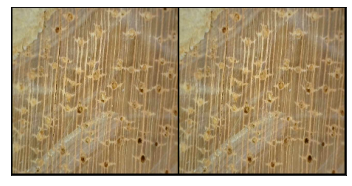

In [15]:
grid = torchvision.utils.make_grid(train_features)
show(grid)